# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## 📚 Libreries:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time  # Import the time module

## 🔌 [API CoinGecko](https://www.coingecko.com/es/api/documentation): conection 

### 🌎📰 Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [2]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
                          id  coin_id                              name  \
0                    apecoin    24383                           ApeCoin   
1                sei-network    28205                               Sei   
2                   arbitrum    16547                          Arbitrum   
3                   optimism    25244                          Optimism   
4  harrypotterobamasonic10in    30323  HarryPotterObamaSonic10Inu (ETH)   
5                   bluzelle     2848                          Bluzelle   
6              worldcoin-wld    31069                         Worldcoin   

    symbol  market_cap_rank  \
0      APE               67   
1      SEI              121   
2      ARB               39   
3       OP               42   
4  BITCOIN              180   
5      BLZ              352   
6      WLD              159   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2438...   
1  https://assets.coi

In [3]:
coins_global_trends = coins_global_trends.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coins_global_trends)

                          id  coin_id                              name  \
0                    apecoin    24383                           apecoin   
1                sei-network    28205                               sei   
2                   arbitrum    16547                          arbitrum   
3                   optimism    25244                          optimism   
4  harrypotterobamasonic10in    30323  harrypotterobamasonic10inu (eth)   
5                   bluzelle     2848                          bluzelle   
6              worldcoin-wld    31069                         worldcoin   

    symbol  market_cap_rank  \
0      ape               67   
1      sei              121   
2      arb               39   
3       op               42   
4  bitcoin              180   
5      blz              352   
6      wld              159   

                                               thumb  \
0  https://assets.coingecko.com/coins/images/2438...   
1  https://assets.coingecko.com/coins/

In [4]:
coins_global_trends.head(10)

,id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,apecoin,24383,apecoin,ape,67,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,apecoin,0.000060,0
1,sei-network,28205,sei,sei,121,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,1
2,arbitrum,16547,arbitrum,arb,39,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,https://assets.coingecko.com/coins/images/1654...,arbitrum,0.000039,2
3,optimism,25244,optimism,op,42,https://assets.coingecko.com/coins/images/2524...,https://assets.coingecko.com/coins/images/2524...,https://assets.coingecko.com/coins/images/2524...,optimism,0.000058,3
4,harrypotterobamasonic10in,30323,harrypotterobamasonic10inu (eth),bitcoin,180,https://assets.coingecko.com/coins/images/3032...,https://assets.coingecko.com/coins/images/3032...,https://assets.coingecko.com/coins/images/3032...,harrypotterobamasonic10inu-eth,0.000006,4
5,bluzelle,2848,bluzelle,blz,352,https://assets.coingecko.com/coins/images/2848...,https://assets.coingecko.com/coins/images/2848...,https://assets.coingecko.com/coins/images/2848...,bluzelle,0.000005,5
6,worldcoin-wld,31069,worldcoin,wld,159,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000057,6


In [5]:
list_rank = coins_global_trends['symbol'].tolist()

In [6]:
coins_global_trends.rename(columns={'id': 'crip_id'}, inplace=True)

#### Guardo csv: coins_global_trends.csv

In [7]:
coins_global_trends.to_csv('../Csvs_cleanned/coins_global_trends.csv', index=False, mode='w',header=True)

In [8]:
list_rank

['ape', 'sei', 'arb', 'op', 'bitcoin', 'blz', 'wld']

_____________________________________________________________

### 🌎📊  Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

#### Conection:

In [9]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

                                                                                   data
active_cryptocurrencies                                                           10116
ended_icos                                                                         3376
market_cap_change_percentage_24h_usd                                          -0.469866
market_cap_percentage                 {'btc': 46.218796544207144, 'eth': 18.34668325...
markets                                                                             830
ongoing_icos                                                                         49
total_market_cap                      {'btc': 42112437.915563844, 'eth': 655264864.0...
total_volume                          {'btc': 1213399.7274402021, 'eth': 18880365.20...
upcoming_icos                                                                         0
updated_at                                                                   1692622127


#### Market_cap_percentage: %

In [10]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['crip_id', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  crip_id  market_cap_percentage
0     btc              46.218797
1     eth              18.346683
2    usdt               7.553287
3     bnb               2.962486
4     xrp               2.532211
5    usdc               2.367310
6   steth               1.260576
7     ada               0.855581
8    doge               0.806640
9     sol               0.791564


#### Market_cap: $

In [11]:
total_market_cap_dict = list_of_global_data.at['total_market_cap', 'data']

# Crear un DataFrame a partir del diccionario
total_market_cap_df = pd.DataFrame(total_market_cap_dict.items(), columns=['crip_id', 'total_market_cap'])

# Imprimir el nuevo DataFrame
print(total_market_cap_df)

   crip_id  total_market_cap
0      btc      4.211244e+07
1      eth      6.552649e+08
2      ltc      1.658142e+10
3      bch      5.828364e+09
4      bnb      5.203952e+09
..     ...               ...
56     xdr      8.205638e+11
57     xag      4.818270e+10
58     xau      5.801760e+08
59    bits      4.211244e+13
60    sats      4.211244e+15

[61 rows x 2 columns]


#### Total_volume: $

In [12]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['crip_id', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   crip_id  total_volume
0      btc  1.213400e+06
1      eth  1.888037e+07
2      ltc  4.777659e+08
3      bch  1.679346e+08
4      bnb  1.499432e+08
..     ...           ...
56     xdr  2.364318e+10
57     xag  1.388304e+09
58     xau  1.671680e+07
59    bits  1.213400e+12
60    sats  1.213400e+14

[61 rows x 2 columns]


#### Merged:

In [13]:
merged_df = market_cap_percentage_df.merge(total_market_cap_df, on='crip_id').merge(total_volume_df, on='crip_id')
merged_df = merged_df.sort_values(by=['market_cap_percentage', 'total_volume'], ascending=[False, False])

print(merged_df)


  crip_id  market_cap_percentage  total_market_cap  total_volume
0     btc              46.218797      4.211244e+07  1.213400e+06
1     eth              18.346683      6.552649e+08  1.888037e+07
2     bnb               2.962486      5.203952e+09  1.499432e+08
3     xrp               2.532211      2.086118e+12  6.010802e+10


#### Guardo csv: tops_criptos.csv

In [14]:
merged_df.to_csv('../Csvs_cleanned/top_criptos.csv', index=False, mode='w',header=True)

#### Combinacion, listado de codigos en los listados recientemente importados:

In [15]:
lista_coins0 = merged_df['crip_id'].tolist()
lista_coins1 = market_cap_percentage_df['crip_id'].tolist()
lista_coins2 = total_market_cap_df['crip_id'].tolist()
lista_coins3 = total_volume_df['crip_id'].tolist()

In [16]:
complete_list = lista_coins0 + lista_coins1 + list_rank #+ lista_coins2 + lista_coins3
complete_list = list(set(complete_list)) #quitar duplicados

##### Listado completo de ids a buscar como los mas recomendados en base a marketcap y total volume de cada cripto. HOY, YA!, AHORA!.

In [17]:
len(complete_list)

17

In [18]:
complete_list_lower = [item.lower() if isinstance(item, str) else item for item in complete_list]


In [19]:
complete_list_lower

['eth',
 'xrp',
 'sei',
 'bitcoin',
 'wld',
 'usdc',
 'btc',
 'blz',
 'ada',
 'op',
 'arb',
 'sol',
 'steth',
 'doge',
 'usdt',
 'bnb',
 'ape']

### 🪙📚 Listado de monedas: 

#### Importando listado de ids criptos API coingecko: Obteniendo el listado de ids anteriormente destacados, o al menos todos los que se encuentren disponibles en API

In [20]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10111                  zynecoin    zyn                   Zynecoin
10112                   zynergy    zyn                    Zynergy
10113                     zyrri    zyr                      Zyrri
10114                       zyx    zyx                        ZYX
10115                       zzz    zzz                GoSleep ZZZ

[10116 rows x 3 columns]


In [21]:
coin_id.head(15)

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
5,0x1-tools-ai-multi-tool,0x1,0x1.tools: AI Multi-tool
6,0xauto-io-contract-auto-deployer,0xa,0xAuto.io : Contract Auto Deployer
7,0xcoco,coco,0xCoco
8,0xdao,oxd,0xDAO
9,0xdao-v2,oxd v2,0xDAO V2


In [22]:
coin_id.shape

(10116, 3)

In [23]:
coin_id = coin_id.drop_duplicates()

#### Filtrado De las mas relevantes:

In [24]:
coin_id = coin_id[
    coin_id['symbol'].isin(complete_list) |
    coin_id['id'].isin(complete_list) |
    coin_id['name'].isin(complete_list)
]


In [25]:
coin_id.head(20)

,id,symbol,name
481,apecoin,ape,ApeCoin
487,apemove,ape,APEmove
546,arbitrum,arb,Arbitrum
552,arb-protocol,arb,ARB Protocol
1095,binancecoin,bnb,BNB
1096,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1102,binance-peg-cardano,ada,Binance-Peg Cardano
1103,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
1111,binance-peg-xrp,xrp,Binance-Peg XRP
1150,bitcoin,btc,Bitcoin


In [26]:
coin_id.shape

(41, 3)

In [27]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

In [28]:
coin_id.isnull().sum()

crip_id    0
symbol     0
name       0
dtype: int64

In [29]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 481 to 9711
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crip_id  41 non-null     object
 1   symbol   41 non-null     object
 2   name     41 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [30]:
coin_id['crip_id'] = coin_id['crip_id'].str.lower()
coin_id['symbol'] = coin_id['symbol'].str.lower()
coin_id['name'] = coin_id['name'].str.lower()

In [31]:

coin_id = coin_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(coin_id)

                                crip_id   symbol  \
481                             apecoin      ape   
487                             apemove      ape   
546                            arbitrum      arb   
552                        arb-protocol      arb   
1095                        binancecoin      bnb   
1096              binance-coin-wormhole      bnb   
1102                binance-peg-cardano      ada   
1103               binance-peg-dogecoin     doge   
1111                    binance-peg-xrp      xrp   
1150                            bitcoin      btc   
1346                           bluzelle      blz   
1454               bridged-tether-linea     usdt   
1455            bridged-tether-stargate     usdt   
1459             bridged-usd-coin-linea     usdc   
1615                            cardano      ada   
2669                           dogecoin     doge   
2694                 doge-on-pulsechain     doge   
3092                           ethereum      eth   
3102        

In [32]:
coin_id = coin_id.reset_index(drop=True)

In [33]:
coin_id.head(10)

,crip_id,symbol,name
0,apecoin,ape,apecoin
1,apemove,ape,apemove
2,arbitrum,arb,arbitrum
3,arb-protocol,arb,arb protocol
4,binancecoin,bnb,bnb
5,binance-coin-wormhole,bnb,binance coin (wormhole)
6,binance-peg-cardano,ada,binance-peg cardano
7,binance-peg-dogecoin,doge,binance-peg dogecoin
8,binance-peg-xrp,xrp,binance-peg xrp
9,bitcoin,btc,bitcoin


In [34]:
coin_id.shape

(41, 3)

##### Guardo csv contenedor de info crip_ip:

In [35]:
coin_id.to_csv('../Csvs_cleanned/coin_id.csv', index=False, mode='w',header=True)

In [36]:
lista_coins1 = coin_id['crip_id'].tolist()
lista_coins2 = coin_id['symbol'].tolist()
lista_coins3 = coin_id['name'].tolist()


In [37]:
lista_coins =  lista_coins1 + lista_coins2 + lista_coins3

In [38]:
lista_coins = list(set(lista_coins))

#### Guardo lista de las mas importantes. para ser luego utilizadas por los demas codigos.

In [39]:
len(lista_coins)

80

In [40]:
lista_coins

['ethereum (wormhole)',
 'wrapped-solana',
 'bluzelle',
 'heco-peg-xrp',
 'bridged usd coin (force bridge)',
 'binance-peg-dogecoin',
 'blz',
 'ada',
 'cardano',
 'doge',
 'worldcoin',
 'binance-peg xrp',
 'binance coin (wormhole)',
 'op',
 'force-bridge-usdc',
 'bridged tether (stargate)',
 'optimism',
 'binancecoin',
 'xrp',
 'arb',
 'oec binance coin',
 'usd-coin',
 'bridged-usd-coin-linea',
 'ethereum',
 'heco-peg binance coin',
 'tether',
 'harrypotterobamapacman8inu',
 'apemove',
 'solana',
 'btc',
 'oec-binance-coin',
 'warioxrpdumbledoreyugioh69inu',
 'eth',
 'sei',
 'usd coin',
 'sol (wormhole)',
 'heco-peg xrp',
 'sol',
 'binance-peg-cardano',
 'bitcoin',
 'wlitidao',
 'wld',
 'lido staked ether',
 'binance-peg dogecoin',
 'ethereum-wormhole',
 'bridged-tether-linea',
 'bridged usd coin (linea)',
 'steth',
 'bridged tether (pulsechain)',
 'tether-pulsechain',
 'usd-coin-pulsechain',
 'worldcoin-wld',
 'dogecoin',
 'sol-wormhole',
 'staked-ether',
 'binance-coin-wormhole',
 'u

#### Producto: lista_coins

##### Agregado de alguunas que si o si queremos que esten

In [41]:
# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['ethereum (wormhole)', 'wrapped-solana', 'bluzelle', 'heco-peg-xrp', 'bridged usd coin (force bridge)', 'binance-peg-dogecoin', 'blz', 'ada', 'cardano', 'doge', 'worldcoin', 'binance-peg xrp', 'binance coin (wormhole)', 'op', 'force-bridge-usdc', 'bridged tether (stargate)', 'optimism', 'binancecoin', 'xrp', 'arb', 'oec binance coin', 'usd-coin', 'bridged-usd-coin-linea', 'ethereum', 'heco-peg binance coin', 'tether', 'harrypotterobamapacman8inu', 'apemove', 'solana', 'btc', 'oec-binance-coin', 'warioxrpdumbledoreyugioh69inu', 'eth', 'sei', 'usd coin', 'sol (wormhole)', 'heco-peg xrp', 'sol', 'binance-peg-cardano', 'bitcoin', 'wlitidao', 'wld', 'lido staked ether', 'binance-peg dogecoin', 'ethereum-wormhole', 'bridged-tether-linea', 'bridged usd coin (linea)', 'steth', 'bridged tether (pulsechain)', 'tether-pulsechain', 'usd-coin-pulsechain', 'worldcoin-wld', 'dogecoin', 'sol-wormhole', 'staked-ether', 'binance-coin-wormhole', 'usd-coin-avalanche-bridged-usdc-e', 'bridged tether (line

##### Cantidad de coins a obtener informacion:

In [42]:
print(len(lista_coins))

82


###  Listado ids coingecko + info general, ranking .. posee info MUY IMPORTANTE https://api.coingecko.com/api/v3/coins/bitcoin?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false

tarda aprox 9 minutos, api limitation for lot of request , have to wait at #429

In [43]:
list_of_coins_id_resume = pd.DataFrame()

def get_coin_id_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_data = response.json()
        coin_id = pd.DataFrame({"crip_id": [crip_id]})
        
        for key, value in coin_data.items():
            if isinstance(value, (int, float, str)):
                coin_id[key] = [value]
        
        return coin_id
    else:
        print(f"Error en la solicitud: Listado de monedas {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_id_list(crip_id)

if __name__ == "__main__":
    
    for crip_id in lista_coins:
        coin_id = get_coin_id_list(crip_id)
        if coin_id is not None:
            list_of_coins_id_resume = pd.concat([list_of_coins_id_resume, coin_id], ignore_index=True)



Error en la solicitud: Listado de monedas ethereum (wormhole) 404
Error en la solicitud: Listado de monedas bridged usd coin (force bridge) 404
Error en la solicitud: Listado de monedas blz 404
Error en la solicitud: Listado de monedas ada 404
Error en la solicitud: Listado de monedas doge 404
Error en la solicitud: Listado de monedas binance-peg xrp 404
Error en la solicitud: Listado de monedas binance coin (wormhole) 404
Error en la solicitud: Listado de monedas op 404
Error en la solicitud: Listado de monedas force-bridge-usdc 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
Error en la solicitud: Listado de monedas bridged tether (stargate) 404
Error en la solicitud: Listado de monedas xrp 404
Error en la solicitud: Listado de monedas arb 404
Error en la solicitud: Listado de monedas oec binance coin 404
Error en la solicitud: Listado de monedas heco-peg binance coin 429
have to wait 60 seconds, pleas wait, we are jumpi

In [44]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          44 non-null     object 
 1   id                               44 non-null     object 
 2   symbol                           44 non-null     object 
 3   name                             44 non-null     object 
 4   asset_platform_id                33 non-null     object 
 5   block_time_in_minutes            44 non-null     int64  
 6   country_origin                   44 non-null     object 
 7   contract_address                 33 non-null     object 
 8   watchlist_portfolio_users        44 non-null     int64  
 9   coingecko_rank                   31 non-null     float64
 10  coingecko_score                  44 non-null     float64
 11  developer_score                  44 non-null     float64
 12  community_score         

In [45]:
list_of_coins_id_resume.head(20)

,crip_id,id,symbol,name,asset_platform_id,block_time_in_minutes,country_origin,contract_address,watchlist_portfolio_users,coingecko_rank,...,community_score,liquidity_score,public_interest_score,last_updated,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,hashing_algorithm,public_notice
0,wrapped-solana,wrapped-solana,sol,Wrapped Solana,solana,0,,So11111111111111111111111111111111111111112,289,968.0,...,50.719,52.431,0.104,2023-08-21T12:50:31.689Z,NaN,NaN,NaN,NaN,NaN,NaN
1,bluzelle,bluzelle,blz,Bluzelle,ethereum,0,SG,0x5732046a883704404f284ce41ffadd5b007fd668,18409,181.0,...,9.601,40.781,0.002,2023-08-21T12:50:48.090Z,2018-01-15,73.53,26.47,352.0,NaN,NaN
2,heco-peg-xrp,heco-peg-xrp,xrp,Heco-Peg XRP,huobi-token,0,,0xa2f3c2446a3e20049708838a779ff8782ce6645a,116,6576.0,...,0.000,1.000,0.022,2023-08-21T12:50:02.935Z,NaN,NaN,NaN,NaN,NaN,NaN
3,binance-peg-dogecoin,binance-peg-dogecoin,doge,Binance-Peg Dogecoin,binance-smart-chain,0,,0xba2ae424d960c26247dd6c32edc70b295c744c43,955,1211.0,...,70.111,21.239,0.010,2023-08-21T12:50:56.286Z,NaN,NaN,NaN,NaN,NaN,NaN
4,cardano,cardano,ada,Cardano,NaN,0,,NaN,724589,7.0,...,58.753,72.124,0.023,2023-08-21T12:50:52.751Z,NaN,87.13,12.87,8.0,NaN,NaN
5,worldcoin,worldcoin,wdc,WorldCoin,NaN,0,,NaN,3571,2685.0,...,7.231,1.000,0.000,2023-08-21T12:49:52.829Z,2013-05-14,NaN,NaN,3623.0,Scrypt,NaN
6,force-bridge-usdc,force-bridge-usdc,usdc,Bridged USD Coin (Force Bridge),godwoken,0,,0x186181e225dc1ad85a4a94164232bd261e351c33,53,NaN,...,0.000,0.000,0.000,2023-08-21T12:51:13.571Z,NaN,NaN,NaN,NaN,NaN,NaN
7,optimism,optimism,op,Optimism,optimistic-ethereum,0,,0x4200000000000000000000000000000000000042,70603,430.0,...,10.608,62.869,0.000,2023-08-21T12:51:58.282Z,NaN,68.57,31.43,41.0,NaN,NaN
8,binancecoin,binancecoin,bnb,BNB,NaN,0,,NaN,642496,5.0,...,61.771,73.073,11.364,2023-08-21T12:52:03.857Z,2017-07-08,46.03,53.97,4.0,NaN,NaN
9,usd-coin,usd-coin,usdc,USD Coin,ethereum,0,US,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,109731,28.0,...,9.747,87.410,0.033,2023-08-21T12:51:57.371Z,NaN,36.36,63.64,6.0,NaN,NaN


In [46]:
columns_to_drop = ['id', 'symbol', 'name', 'country_origin', 'contract_address','hashing_algorithm','genesis_date']
list_of_coins_id_resume.drop(columns=columns_to_drop, inplace=True)

In [47]:
# Suponiendo que list_of_coins_id_resume ya está definido como DataFrame
list_of_coins_id_resume['last_updated'] = pd.to_datetime(list_of_coins_id_resume['last_updated'])


In [48]:

list_of_coins_id_resume = list_of_coins_id_resume.head().applymap(lambda x: x.lower() if isinstance(x, str) else x)

print(list_of_coins_id_resume.head())

                crip_id    asset_platform_id  block_time_in_minutes  \
0        wrapped-solana               solana                      0   
1              bluzelle             ethereum                      0   
2          heco-peg-xrp          huobi-token                      0   
3  binance-peg-dogecoin  binance-smart-chain                      0   
4               cardano                  NaN                      0   

   watchlist_portfolio_users  coingecko_rank  coingecko_score  \
0                        289           968.0           21.650   
1                      18409           181.0           38.434   
2                        116          6576.0            0.201   
3                        955          1211.0           19.673   
4                     724589             7.0           62.536   

   developer_score  community_score  liquidity_score  public_interest_score  \
0            0.000           50.719           52.431                  0.104   
1           61.154      

In [49]:
list_of_coins_id_resume.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,wrapped-solana,solana,0,289,968.0,21.650,0.000,50.719,52.431,0.104,2023-08-21 12:50:31.689000+00:00,NaN,NaN,NaN,NaN
1,bluzelle,ethereum,0,18409,181.0,38.434,61.154,9.601,40.781,0.002,2023-08-21 12:50:48.090000+00:00,73.53,26.47,352.0,NaN
2,heco-peg-xrp,huobi-token,0,116,6576.0,0.201,0.000,0.000,1.000,0.022,2023-08-21 12:50:02.935000+00:00,NaN,NaN,NaN,NaN
3,binance-peg-dogecoin,binance-smart-chain,0,955,1211.0,19.673,0.000,70.111,21.239,0.010,2023-08-21 12:50:56.286000+00:00,NaN,NaN,NaN,NaN
4,cardano,NaN,0,724589,7.0,62.536,70.270,58.753,72.124,0.023,2023-08-21 12:50:52.751000+00:00,87.13,12.87,8.0,NaN


In [50]:
list_of_coins_id_resume.shape

(5, 15)

##### Guardo csv ranking_coingecko:

In [51]:
list_of_coins_id_resume.to_csv('../Csvs_cleanned/ranking_coingecko.csv', index=False , mode= 'w',header=True)

In [52]:
# Obtener valores únicos de la columna 'crip_id'
lista_coins = list_of_coins_id_resume['crip_id'].unique().tolist()

# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['wrapped-solana', 'bluzelle', 'heco-peg-xrp', 'binance-peg-dogecoin', 'cardano', 'ethereum', 'bitcoin']


### 📊 Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

hacer que guarde toda la data en un dataframe

In [53]:
day_interval = 163
list_of_coins_resume = pd.DataFrame()

def get_coin_list_of_prices(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print(f"Error en la solicitud para {crip_id}: {response.status_code}")
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_list_of_prices(crip_id) # Reintentar error 429
        


if __name__ == "__main__":
    for crip_id in lista_coins:
        list_of_prices = get_coin_list_of_prices(crip_id)
        if list_of_prices is not None:
            list_of_prices['crip_id'] = crip_id
            list_of_coins_resume = pd.concat([list_of_coins_resume, list_of_prices], ignore_index=True)
        

    print(list_of_coins_resume)
    

Error en la solicitud para binance-peg-dogecoin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...
                            prices                          market_caps  \
0        [1678579200000, 18.07935]                 [1678579200000, 0.0]   
1        [1678665600000, 20.19637]                 [1678665600000, 0.0]   
2        [1678752000000, 20.40394]                 [1678752000000, 0.0]   
3        [1678838400000, 20.96601]                 [1678838400000, 0.0]   
4        [1678924800000, 19.34263]                 [1678924800000, 0.0]   
...                            ...                                  ...   
1143  [1692316800000, 26501.58727]  [1692316800000, 516026928368.83746]   
1144  [1692403200000, 26042.83826]   [1692403200000, 506815826635.9217]   
1145  [1692489600000, 26104.77863]  [1692489600000, 508087686822.70435]   
1146  [1692576000000, 26160.70042]   [1692576000000, 509078930366.0949]   
1147  [1692595

In [54]:
print(list_of_coins_resume.tail(4))
print(list_of_coins_resume.head(4))
print(list_of_coins_resume.shape)

                            prices                          market_caps  \
1144  [1692403200000, 26042.83826]   [1692403200000, 506815826635.9217]   
1145  [1692489600000, 26104.77863]  [1692489600000, 508087686822.70435]   
1146  [1692576000000, 26160.70042]   [1692576000000, 509078930366.0949]   
1147  [1692595656000, 26084.75645]  [1692595656000, 507706941962.85004]   

                            total_volumes  crip_id  
1144   [1692403200000, 18062351745.50358]  bitcoin  
1145  [1692489600000, 3355038748.9824667]  bitcoin  
1146   [1692576000000, 8304370131.833873]  bitcoin  
1147   [1692595656000, 9136828929.177465]  bitcoin  
                      prices           market_caps  \
0  [1678579200000, 18.07935]  [1678579200000, 0.0]   
1  [1678665600000, 20.19637]  [1678665600000, 0.0]   
2  [1678752000000, 20.40394]  [1678752000000, 0.0]   
3  [1678838400000, 20.96601]  [1678838400000, 0.0]   

                         total_volumes         crip_id  
0   [1678579200000, 57003638.60

In [55]:
list_of_coins_resume.head()

,prices,market_caps,total_volumes,crip_id
0,"[1678579200000, 18.07935]","[1678579200000, 0.0]","[1678579200000, 57003638.60073608]",wrapped-solana
1,"[1678665600000, 20.19637]","[1678665600000, 0.0]","[1678665600000, 27145900.515666656]",wrapped-solana
2,"[1678752000000, 20.40394]","[1678752000000, 0.0]","[1678752000000, 43913866.660858825]",wrapped-solana
3,"[1678838400000, 20.96601]","[1678838400000, 0.0]","[1678838400000, 31756342.367306508]",wrapped-solana
4,"[1678924800000, 19.34263]","[1678924800000, 0.0]","[1678924800000, 29944219.251400806]",wrapped-solana


####  Extraer de las listas los valores necesarios

In [56]:
prices_list_ko = pd.DataFrame()
# print(type(list_of_coins_resume['prices'][1]))
# print(list_of_coins_resume['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_coins_resume['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_coins_resume['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_coins_resume['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_coins_resume['total_volumes'].apply(lambda lista: lista[1])
prices['crip_id'] = list_of_coins_resume['crip_id']

In [57]:
prices = prices.drop_duplicates()

In [58]:
prices.shape

(1148, 5)

In [59]:

cantidad_valores_unicos = prices['crip_id'].nunique()
print(cantidad_valores_unicos)

7


In [60]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1148 non-null   int64  
 1   price         1148 non-null   float64
 2   market_cap    1148 non-null   float64
 3   total_volume  1148 non-null   float64
 4   crip_id       1148 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 45.0+ KB


In [61]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

In [62]:
# Reordeno
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [63]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,wrapped-solana,1678579200000,18.07935,0.0,57003640.0
1,wrapped-solana,1678665600000,20.19637,0.0,27145900.0
2,wrapped-solana,1678752000000,20.40394,0.0,43913868.0
3,wrapped-solana,1678838400000,20.96601,0.0,31756342.0
4,wrapped-solana,1678924800000,19.34263,0.0,29944220.0


In [64]:
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

##### Guardo csv prices:

In [65]:
prices.to_csv('../Csvs_cleanned/prices.csv', index=False, mode='w', header=True)

#### Prices_normalized:

In [66]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()
prices_normalized = pd.DataFrame()
# Seleccionar columnas para normalizar y ajustar el escalador
columns_to_normalize = ['price', 'market_cap', 'total_volume']
prices_normalized[columns_to_normalize] = scaler.fit_transform(prices[columns_to_normalize])
prices_normalized['crip_id'] = prices['crip_id']
prices_normalized['timestamp'] = prices['timestamp']

In [67]:
prices_normalized = prices_normalized[['crip_id','timestamp','price','market_cap','total_volume']]
prices_normalized.head()

,crip_id,timestamp,price,market_cap,total_volume
0,wrapped-solana,2023-03-12,0.000573,0.0,0.000806
1,wrapped-solana,2023-03-13,0.000641,0.0,0.000384
2,wrapped-solana,2023-03-14,0.000647,0.0,0.000621
3,wrapped-solana,2023-03-15,0.000665,0.0,0.000449
4,wrapped-solana,2023-03-16,0.000614,0.0,0.000423


##### Guardo prices_normalized.csv

In [68]:
prices_normalized.to_csv('../Csvs_cleanned/prices_normalized.csv', index=False, mode='w',header=True)

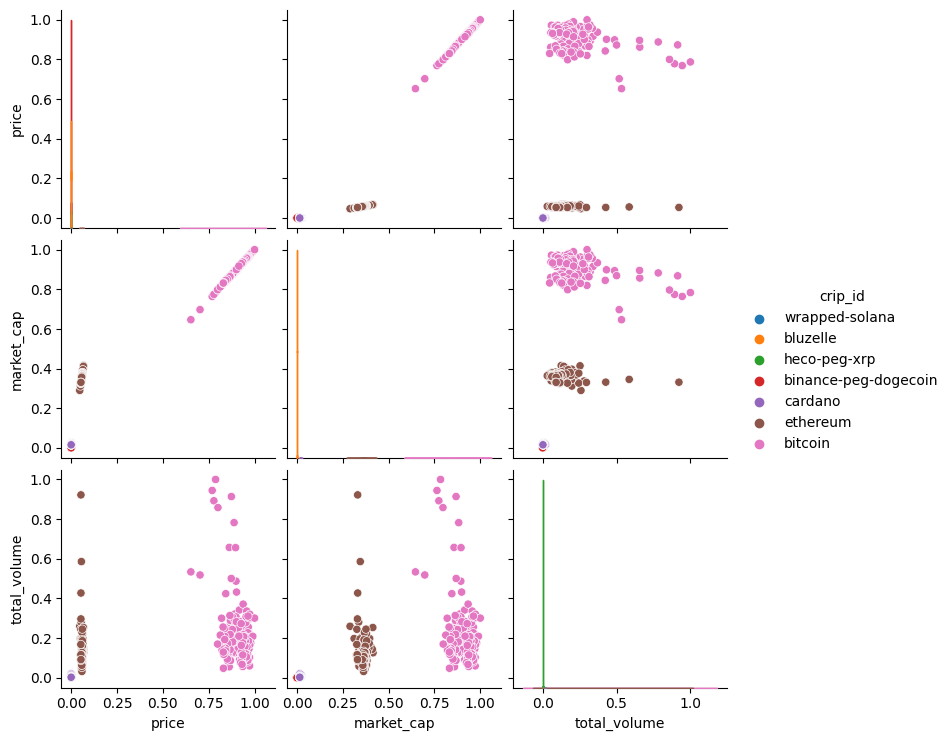

In [69]:
sns.pairplot(prices_normalized, hue = 'crip_id')

### 📈 OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [70]:
def get_coin_ohlc_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        list_of_ohlc = response.json()
        df = pd.DataFrame(list_of_ohlc, columns=["timestamp", "open_price", "high_price", "low_price", "close_price"])
        df["crip_id"] = crip_id
        return df
    else:
        print(f"Error en la solicitud: Datos OHLC de {crip_id}", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_ohlc_list(crip_id)

if __name__ == "__main__":
   
    list_of_ohlc_data = pd.DataFrame()

    for crip_id in lista_coins:
        ohlc_data = get_coin_ohlc_list(crip_id)
        if ohlc_data is not None:
            list_of_ohlc_data = pd.concat([list_of_ohlc_data, ohlc_data], ignore_index=True)



In [71]:
list_of_ohlc_data = list_of_ohlc_data.drop_duplicates()

In [72]:
list_of_ohlc_data.isnull().sum()

timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
crip_id        0
dtype: int64

In [73]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1261 non-null   int64  
 1   open_price   1261 non-null   float64
 2   high_price   1261 non-null   float64
 3   low_price    1261 non-null   float64
 4   close_price  1261 non-null   float64
 5   crip_id      1261 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 59.2+ KB
None


In [74]:
list_of_ohlc_data.head()

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,1690041600000,25.58260,25.68642,25.58260,25.68642,wrapped-solana
1,1690056000000,25.70737,25.70737,25.32322,25.32322,wrapped-solana
2,1690070400000,25.33261,25.33261,25.23330,25.26969,wrapped-solana
3,1690084800000,24.44166,24.64354,24.28331,24.64354,wrapped-solana
4,1690099200000,24.76424,24.80549,24.72103,24.72919,wrapped-solana


In [75]:
list_of_ohlc_data['timestamp'] = pd.to_datetime(list_of_ohlc_data['timestamp'], unit='ms')


In [76]:
unique_count = list_of_ohlc_data['crip_id'].nunique()
print(unique_count)


7


##### Guardo csv OHLC:

In [77]:
list_of_ohlc_data.to_csv('../Csvs_cleanned/ohlc_prices.csv', index=False, mode='w',header=True)

### 📃 tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [78]:


def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print(f"Error en la solicitud de tickers {crip_id}:", response.status_code)
        if response.status_code == 429:
            print('have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...')
            time.sleep(61)
            return get_coin_tickers(coin_id)  # Reintentar la solicitud después de esperar
            
if __name__ == "__main__":
    tickers_resume = pd.DataFrame()

    for crip_id in lista_coins:
        ticker_data = get_coin_tickers(crip_id)
            
        if ticker_data is not None:
            tickers = ticker_data['tickers']
            
            for ticker in tickers:
                ticker['coin_id'] = crip_id
                
                # Crear un DataFrame a partir de los datos del ticker
                ticker_df = pd.DataFrame([ticker])
                tickers_resume = pd.concat([tickers_resume, ticker_df], ignore_index=True)

Error en la solicitud de tickers binance-peg-dogecoin: 429
have to wait 60 seconds, pleas wait, we are jumping from the apicoin limits, this is to get more data in...


In [79]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [80]:
tickers_resume.head(10)

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,7DHBWXMCI3DT8UFYWYZWEBLXGYCU7Y3IL6TRKN1Y7ARJ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.124090,2.230450e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 20.438295, 'eth': 318.071, 'usd': 531482}",green,0.60302,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
1,MSOLZYCXHDYGDZU16G5QSH3I5K3Z3KZK7YTFQCJM7SO,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.129361,3.643543e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 33.54347, 'eth': 522.02, 'usd': 872272}",green,0.603051,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
2,SCSUPPNUSYPLBSV4DARSRYNG4ANPGAGHKHSA3GMMYJZ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.000128,2.284161e+07,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 2.380955, 'eth': 37.053605, 'usd': 61915}",green,0.60317,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
3,DUSTAWUCRTSGU8HCQRDHDCBUYHCPADMLM2VCCB8VNFNQ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.040704,1.182662e+05,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 3.924154, 'eth': 61.07, 'usd': 102045}",green,0.603602,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
4,RLBXXFKSEAZ4RGJH3SQN8JXXHMGOZ9JWXDNJMH8PL7A,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.007362,1.787707e+06,"{'btc': 0.00081786, 'eth': 0.01272798, 'usd': 21.27}","{'btc': 10.763989, 'eth': 167.515, 'usd': 279909}",green,0.603715,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
5,J1TOSO1UCK3RLMJORHTTRVWY9HJ7X8V9YYAC6Y7KGCPN,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.052781,8.697344e+03,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 7.464073, 'eth': 116.16, 'usd': 194097}",green,0.603963,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
6,BSO13R4TKIE4KUML71LSHTPPL2EUBYLFX6H9HP3PIY1,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.075355,7.128368e+03,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 6.248752, 'eth': 97.246, 'usd': 162494}",green,0.604711,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
7,ORCAEKTDK7LKZ57VAAYR9QENSVEPFIU6QEMU1KEKTZE,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.038814,2.497872e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 0.79034201, 'eth': 12.299697, 'usd': 20552}",green,0.604434,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,2023-08-21T12:59:38+00:00,False,False,https://www.orca.so/,None,wrapped-solana,wrapped-solana
8,HNTYVP6YFM1HG25TN9WGLQM12B8TQMCKNKRDU1OXWUX,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.084778,2.815765

In [81]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = tickers_resume[tickers_resume.isnull().any(axis=1)]
rows_with_nulls.head(15)
print(rows_with_nulls.shape)

(445, 18)


In [82]:
tickers_resume['token_info_url'] = tickers_resume['token_info_url'].fillna('not founded token_info_url #404')
tickers_resume['trade_url'] = tickers_resume['trade_url'].fillna('not founded trade_url #404')

In [83]:
tickers_resume['target_coin_id'] = tickers_resume['target_coin_id'].fillna('USD')

In [84]:
tickers_resume.shape

(448, 18)

In [85]:
tickers_resume.isnull().sum()

base                          0
target                        0
market                        0
last                          0
volume                        0
converted_last                0
converted_volume              0
trust_score                  58
bid_ask_spread_percentage    49
timestamp                     0
last_traded_at                0
last_fetch_at                 0
is_anomaly                    0
is_stale                      0
trade_url                     0
token_info_url                0
coin_id                       0
target_coin_id                0
dtype: int64

#### Timestamp

In [86]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
tickers_resume['timestamp'] = tickers_resume['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_traded_at'] = tickers_resume['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_fetch_at'] = tickers_resume['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [87]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,7DHBWXMCI3DT8UFYWYZWEBLXGYCU7Y3IL6TRKN1Y7ARJ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.124090,2.230450e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 20.438295, 'eth': 318.071, 'usd': 531482}",green,0.60302,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana
1,MSOLZYCXHDYGDZU16G5QSH3I5K3Z3KZK7YTFQCJM7SO,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.129361,3.643543e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 33.54347, 'eth': 522.02, 'usd': 872272}",green,0.603051,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana
2,SCSUPPNUSYPLBSV4DARSRYNG4ANPGAGHKHSA3GMMYJZ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.000128,2.284161e+07,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 2.380955, 'eth': 37.053605, 'usd': 61915}",green,0.60317,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana
3,DUSTAWUCRTSGU8HCQRDHDCBUYHCPADMLM2VCCB8VNFNQ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.040704,1.182662e+05,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 3.924154, 'eth': 61.07, 'usd': 102045}",green,0.603602,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana
4,RLBXXFKSEAZ4RGJH3SQN8JXXHMGOZ9JWXDNJMH8PL7A,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.007362,1.787707e+06,"{'btc': 0.00081786, 'eth': 0.01272798, 'usd': 21.27}","{'btc': 10.763989, 'eth': 167.515, 'usd': 279909}",green,0.603715,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana


#### market

In [88]:
tickers_resume['marketplace'] = tickers_resume['market'].apply(lambda x: x['name'])
tickers_resume['marketplace_id'] = tickers_resume['market'].apply(lambda x: x['identifier'])

In [89]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,7DHBWXMCI3DT8UFYWYZWEBLXGYCU7Y3IL6TRKN1Y7ARJ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.124090,2.230450e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 20.438295, 'eth': 318.071, 'usd': 531482}",green,0.60302,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca
1,MSOLZYCXHDYGDZU16G5QSH3I5K3Z3KZK7YTFQCJM7SO,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.129361,3.643543e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 33.54347, 'eth': 522.02, 'usd': 872272}",green,0.603051,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca
2,SCSUPPNUSYPLBSV4DARSRYNG4ANPGAGHKHSA3GMMYJZ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.000128,2.284161e+07,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 2.380955, 'eth': 37.053605, 'usd': 61915}",green,0.60317,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca
3,DUSTAWUCRTSGU8HCQRDHDCBUYHCPADMLM2VCCB8VNFNQ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.040704,1.182662e+05,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 3.924154, 'eth': 61.07, 'usd': 102045}",green,0.603602,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca
4,RLBXXFKSEAZ4RGJH3SQN8JXXHMGOZ9JWXDNJMH8PL7A,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.007362,1.787707e+06,"{'btc': 0.00081786, 'eth': 0.01272798, 'usd': 21.27}","{'btc': 10.763989, 'eth': 167.515, 'usd': 279909}",green,0.603715,1692622778000,1692622778000,1692622778000,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca


#### converted_last


In [90]:
tickers_resume['converted_last_btc'] = tickers_resume['converted_last'].apply(lambda x: x['btc'])
tickers_resume['converted_last_eth'] = tickers_resume['converted_last'].apply(lambda x: x['eth'])
tickers_resume['converted_last_usd'] = tickers_resume['converted_last'].apply(lambda x: x['usd'])

In [91]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       448 non-null    object 
 1   target                     448 non-null    object 
 2   market                     448 non-null    object 
 3   last                       448 non-null    float64
 4   volume                     448 non-null    float64
 5   converted_last             448 non-null    object 
 6   converted_volume           448 non-null    object 
 7   trust_score                390 non-null    object 
 8   bid_ask_spread_percentage  399 non-null    object 
 9   timestamp                  448 non-null    int64  
 10  last_traded_at             448 non-null    int64  
 11  last_fetch_at              448 non-null    int64  
 12  is_anomaly                 448 non-null    bool   
 13  is_stale                   448 non-null    bool   

In [92]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,7DHBWXMCI3DT8UFYWYZWEBLXGYCU7Y3IL6TRKN1Y7ARJ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.124090,2.230450e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 20.438295, 'eth': 318.071, 'usd': 531482}",green,0.60302,1692622778000,...,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca,0.000815,0.012686,21.20
1,MSOLZYCXHDYGDZU16G5QSH3I5K3Z3KZK7YTFQCJM7SO,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",1.129361,3.643543e+04,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 33.54347, 'eth': 522.02, 'usd': 872272}",green,0.603051,1692622778000,...,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca,0.000815,0.012686,21.20
2,SCSUPPNUSYPLBSV4DARSRYNG4ANPGAGHKHSA3GMMYJZ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.000128,2.284161e+07,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 2.380955, 'eth': 37.053605, 'usd': 61915}",green,0.60317,1692622778000,...,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca,0.000815,0.012686,21.20
3,DUSTAWUCRTSGU8HCQRDHDCBUYHCPADMLM2VCCB8VNFNQ,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.040704,1.182662e+05,"{'btc': 0.00081518, 'eth': 0.01268617, 'usd': 21.2}","{'btc': 3.924154, 'eth': 61.07, 'usd': 102045}",green,0.603602,1692622778000,...,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca,0.000815,0.012686,21.20
4,RLBXXFKSEAZ4RGJH3SQN8JXXHMGOZ9JWXDNJMH8PL7A,SO11111111111111111111111111111111111111112,"{'name': 'Orca', 'identifier': 'orca', 'has_trading_incentive': False}",0.007362,1.787707e+06,"{'btc': 0.00081786, 'eth': 0.01272798, 'usd': 21.27}","{'btc': 10.763989, 'eth': 167.515, 'usd': 279909}",green,0.603715,1692622778000,...,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,Orca,orca,0.000818,0.012728,21.27


#### converted_volume


In [93]:
tickers_resume['converted_volume_btc'] = tickers_resume['converted_volume'].apply(lambda x: x['btc'])
tickers_resume['converted_volume_eth'] = tickers_resume['converted_volume'].apply(lambda x: x['eth'])
tickers_resume['converted_volume_usd'] = tickers_resume['converted_volume'].apply(lambda x: x['usd'])

In [94]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       448 non-null    object 
 1   target                     448 non-null    object 
 2   market                     448 non-null    object 
 3   last                       448 non-null    float64
 4   volume                     448 non-null    float64
 5   converted_last             448 non-null    object 
 6   converted_volume           448 non-null    object 
 7   trust_score                390 non-null    object 
 8   bid_ask_spread_percentage  399 non-null    object 
 9   timestamp                  448 non-null    int64  
 10  last_traded_at             448 non-null    int64  
 11  last_fetch_at              448 non-null    int64  
 12  is_anomaly                 448 non-null    bool   
 13  is_stale                   448 non-null    bool   

In [95]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
tickers_resume = tickers_resume.drop(columns=column_drop)

In [96]:
tickers_resume = tickers_resume.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [97]:
tickers_resume.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,7dhbwxmci3dt8ufywyzweblxgycu7y3il6trkn1y7arj,so11111111111111111111111111111111111111112,1.124090,2.230450e+04,green,0.603020,1692622778000,1692622778000,1692622778000,False,...,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,20.438295,318.071000,531482.0
1,msolzycxhdygdzu16g5qsh3i5k3z3kzk7ytfqcjm7so,so11111111111111111111111111111111111111112,1.129361,3.643543e+04,green,0.603051,1692622778000,1692622778000,1692622778000,False,...,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,33.543470,522.020000,872272.0
2,scsuppnusyplbsv4darsryng4anpgaghkhsa3gmmyjz,so11111111111111111111111111111111111111112,0.000128,2.284161e+07,green,0.603170,1692622778000,1692622778000,1692622778000,False,...,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,2.380955,37.053605,61915.0
3,dustawucrtsgu8hcqrdhdcbuyhcpadmlm2vccb8vnfnq,so11111111111111111111111111111111111111112,0.040704,1.182662e+05,green,0.603602,1692622778000,1692622778000,1692622778000,False,...,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,3.924154,61.070000,102045.0
4,rlbxxfkseaz4rgjh3sqn8jxxhmgoz9jwxdnjmh8pl7a,so11111111111111111111111111111111111111112,0.007362,1.787707e+06,green,0.603715,1692622778000,1692622778000,1692622778000,False,...,wrapped-solana,wrapped-solana,orca,orca,0.000818,0.012728,21.27,10.763989,167.515000,279909.0


In [98]:
tickers_resume['timestamp'] = pd.to_datetime(tickers_resume['timestamp'], unit='ms')
tickers_resume['last_traded_at'] = pd.to_datetime(tickers_resume['last_traded_at'], unit='ms')
tickers_resume['last_fetch_at'] = pd.to_datetime(tickers_resume['last_fetch_at'], unit='ms')

In [99]:
# Renombrar la columna
tickers_resume.rename(columns={'coin_id': 'crip_id'}, inplace=True)

##### Guardo ticker.csv:

In [100]:
tickers_resume.to_csv('../Csvs_cleanned/tickers_resume.csv', index=False, mode='w',header=True)

In [101]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   base                       448 non-null    object        
 1   target                     448 non-null    object        
 2   last                       448 non-null    float64       
 3   volume                     448 non-null    float64       
 4   trust_score                390 non-null    object        
 5   bid_ask_spread_percentage  399 non-null    float64       
 6   timestamp                  448 non-null    datetime64[ns]
 7   last_traded_at             448 non-null    datetime64[ns]
 8   last_fetch_at              448 non-null    datetime64[ns]
 9   is_anomaly                 448 non-null    bool          
 10  is_stale                   448 non-null    bool          
 11  trade_url                  448 non-null    object        
 12  token_in

#### ticker_df numeric cols correlation matrix

In [102]:

# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

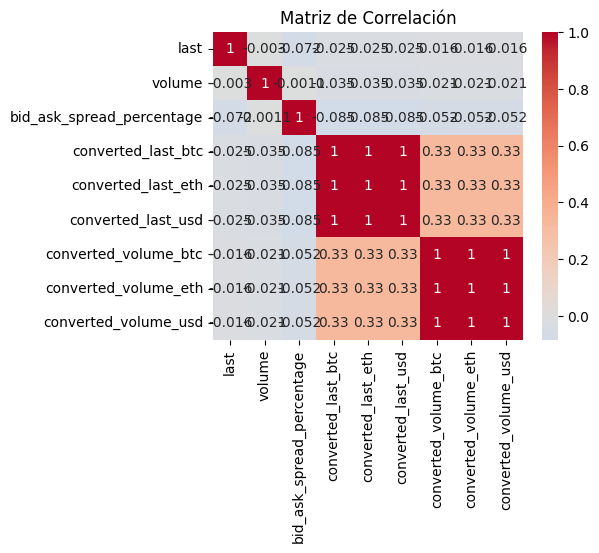

In [103]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [104]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [105]:
tickers_resume.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,7dhbwxmci3dt8ufywyzweblxgycu7y3il6trkn1y7arj,so11111111111111111111111111111111111111112,1.124090,2.230450e+04,green,0.603020,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,20.438295,318.071000,531482.0
1,msolzycxhdygdzu16g5qsh3i5k3z3kzk7ytfqcjm7so,so11111111111111111111111111111111111111112,1.129361,3.643543e+04,green,0.603051,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,33.543470,522.020000,872272.0
2,scsuppnusyplbsv4darsryng4anpgaghkhsa3gmmyjz,so11111111111111111111111111111111111111112,0.000128,2.284161e+07,green,0.603170,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,2.380955,37.053605,61915.0
3,dustawucrtsgu8hcqrdhdcbuyhcpadmlm2vccb8vnfnq,so11111111111111111111111111111111111111112,0.040704,1.182662e+05,green,0.603602,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,3.924154,61.070000,102045.0
4,rlbxxfkseaz4rgjh3sqn8jxxhmgoz9jwxdnjmh8pl7a,so11111111111111111111111111111111111111112,0.007362,1.787707e+06,green,0.603715,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000818,0.012728,21.27,10.763989,167.515000,279909.0
5,j1toso1uck3rlmjorhttrvwy9hj7x8v9yyac6y7kgcpn,so11111111111111111111111111111111111111112,1.052781,8.697344e+03,green,0.603963,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,7.464073,116.160000,194097.0
6,bso13r4tkie4kuml71lshtppl2eubylfx6h9hp3piy1,so11111111111111111111111111111111111111112,1.075355,7.128368e+03,green,0.604711,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,6.248752,97.246000,162494.0
7,orcaektdk7lkz57vaayr9qensvepfiu6qemu1kektze,so11111111111111111111111111111111111111112,0.038814,2.497872e+04,green,0.604434,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000815,0.012686,21.20,0.790342,12.299697,20552.0
8,hntyvp6yfm1hg25tn9wglqm12b8tqmcknkrdu1oxwux,so11111111111111111111111111111111111111112,0.084778,2.815765e+04,green,0.604556,2023-08-21 12:59:38,2023-08-21 12:59:38,2023-08-21 12:59:38,False,False,https://www.orca.so/,not founded token_info_url #404,wrapped-solana,wrapped-solana,orca,orca,0.000818,0.012728,21.27,1.952363,30.383641,50770.0
9,0x570a5d26f7765ecb712c0924e4de545b89fd43df,0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,0.101062,2.830710e+03,green,0.604804,2023-08-21 12:55:30,2023-08-21 12:55:30,2023-08-21 12:58:19,False,False,https://exchange.biswap.org/#/swap?inputcurrency=0x570a5d26f7765ecb712c0924e4de545b89fd43df&outputcurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c,not founded token_info_url #404,wrapped-solana,wbnb,biswap,biswap,0.000814,0.012674,21.18,1.933980,30.095337,50296.0


### normalized ticker_df for ML then

In [106]:
# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [107]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,1.124090,2.230450e+04,0.603020,0.000815,0.012686,21.20,20.438295,318.071000,531482.0
1,1.129361,3.643543e+04,0.603051,0.000815,0.012686,21.20,33.543470,522.020000,872272.0
2,0.000128,2.284161e+07,0.603170,0.000815,0.012686,21.20,2.380955,37.053605,61915.0
3,0.040704,1.182662e+05,0.603602,0.000815,0.012686,21.20,3.924154,61.070000,102045.0
4,0.007362,1.787707e+06,0.603715,0.000818,0.012728,21.27,10.763989,167.515000,279909.0


In [108]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [109]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,1.333223e-08,6.371192e-08,0.008247,0.000812,0.000812,0.000812,0.000850,0.000850,0.000850
1,1.339475e-08,1.040764e-07,0.008248,0.000812,0.000812,0.000812,0.001395,0.001395,0.001395
2,1.516612e-12,6.524616e-05,0.008249,0.000812,0.000812,0.000812,0.000099,0.000099,0.000099
3,4.827653e-10,3.378227e-07,0.008255,0.000812,0.000812,0.000812,0.000163,0.000163,0.000163
4,8.731698e-11,5.106514e-06,0.008257,0.000815,0.000815,0.000815,0.000448,0.000448,0.000448


##### Guardo normalized_tickers_resume.csv

In [110]:
normalized_df.to_csv('../Csvs_cleanned/normalized_tickers_resume.csv', index=False, mode='w',header=True)

### 🌎📊 Global Eecentralized Finance(defi) data: # Aún no utiliazda...
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [111]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                                     data
defi_dominance            3.8407392538431915905580403874839944845452697873866539571052339
defi_market_cap                                           42042948688.8279677601691655088
defi_to_eth_ratio        20.9303564343610747483747906506169689110094432284355541959037903
eth_market_cap                                           200870677098.4876504768512295056
top_coin_defi_dominance                                                         32.827978
top_coin_name                                                           Lido Staked Ether
trading_volume_24h                                        1291608075.46308401985665380248


### notas: En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..

_________________________________________

# 📝 🧠 Funcion Generadora de informacion: